In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [2]:
#importing data
df=pd.read_csv('news.csv')
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
#taking a look at the labels and making sure they are in a binary form
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [4]:
#training the data and calling a word vectorizer to classify 

x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2)

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [5]:
#fitting the data and using our word classifier

pac = PassiveAggressiveClassifier(max_iter=100000)
pac.fit(tfidf_train,y_train)



PassiveAggressiveClassifier(max_iter=100000)

In [6]:
#predicting on the test sample and showing the accuracy

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.4%


<AxesSubplot:>

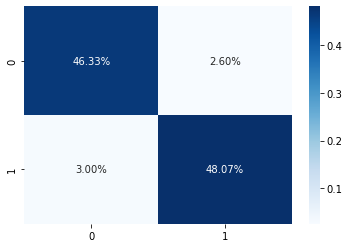

In [7]:
#creating a heatmap to vizualize the true positives and true negatives to evaluate our model.

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [13]:
#Adding everything together and testing different parameters

def run_exp():
    labs = ['text', 'title']
    n = [10 ** x for x in range(2, 4)]
    test_size = [round(random.uniform(0.25,0.8),2) for _ in range(len(n))]
    for words in labs:
        for size in test_size:
            
            df=pd.read_csv('news.csv')
            x_train,x_test,y_train,y_test=train_test_split(df[words], labels, test_size=size)
            tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
            tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
            tfidf_test=tfidf_vectorizer.transform(x_test)
            fig, axes = plt.subplots(1, len(n),figsize=(20, 12))


            for i in range(len(n)):
                
                pac = PassiveAggressiveClassifier(max_iter=n[i])
                pac.fit(tfidf_train,y_train)
                y_pred=pac.predict(tfidf_test)
                score=accuracy_score(y_test,y_pred)
                
                print(f'Accuracy for {n[i]} iterations in {words}: {round(score*100,2)}% \nTest size: {size}')
                
                cm = confusion_matrix(y_test,y_pred)
                sns.heatmap(cm/np.sum(cm),ax=axes[i], annot=True, fmt='.2%',
                     cmap='Blues', cbar = False,linewidths=.5)
                axes[i].set_title(f' iteration: {n[i]} for {words} with test size: {size}')


Accuracy for 100 iterations in text: 92.83% 
Test size: 0.68
Accuracy for 1000 iterations in text: 92.99% 
Test size: 0.68
Accuracy for 100 iterations in text: 92.19% 
Test size: 0.58
Accuracy for 1000 iterations in text: 92.11% 
Test size: 0.58
Accuracy for 100 iterations in title: 74.95% 
Test size: 0.68
Accuracy for 1000 iterations in title: 75.21% 
Test size: 0.68
Accuracy for 100 iterations in title: 76.24% 
Test size: 0.58
Accuracy for 1000 iterations in title: 76.16% 
Test size: 0.58


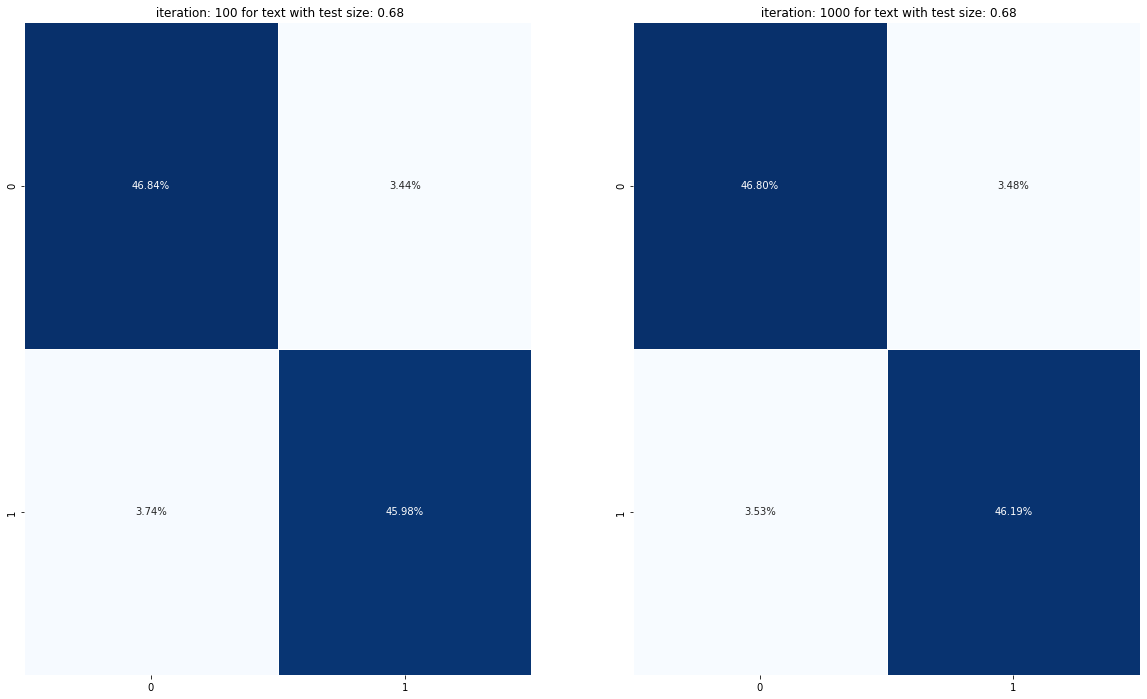

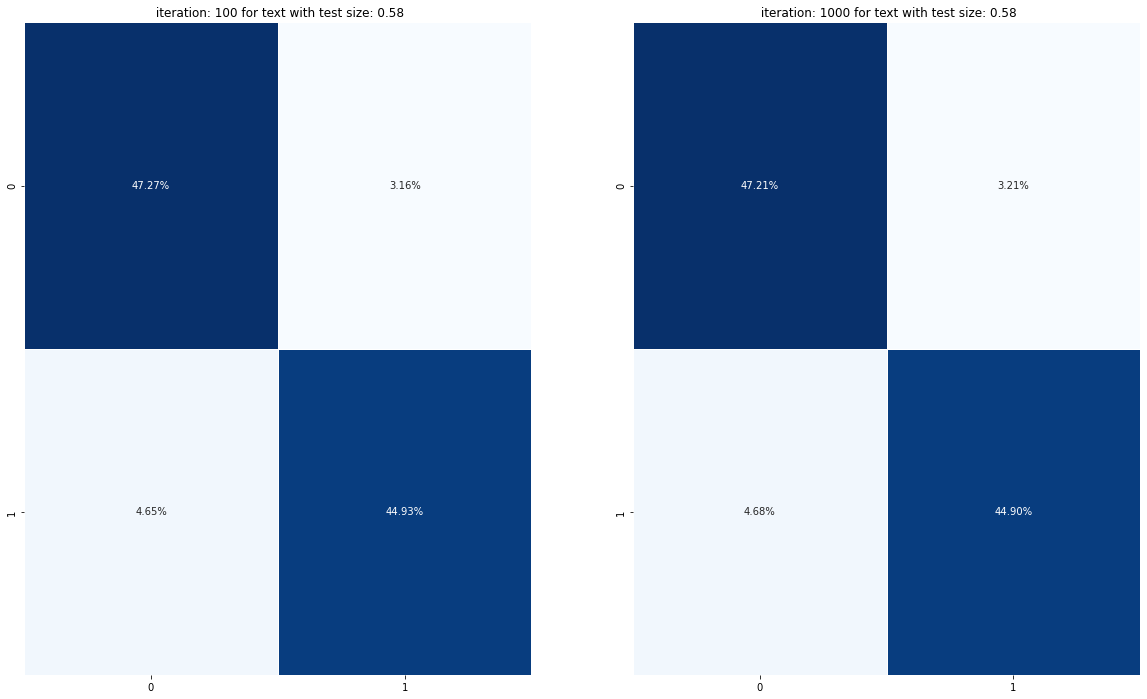

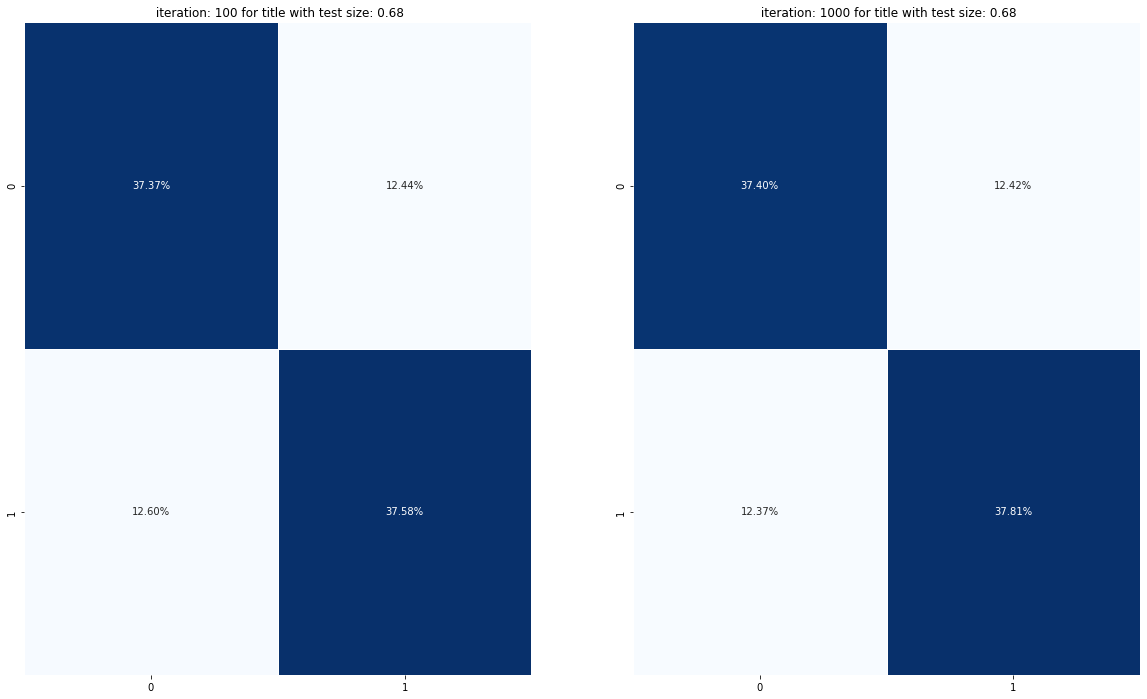

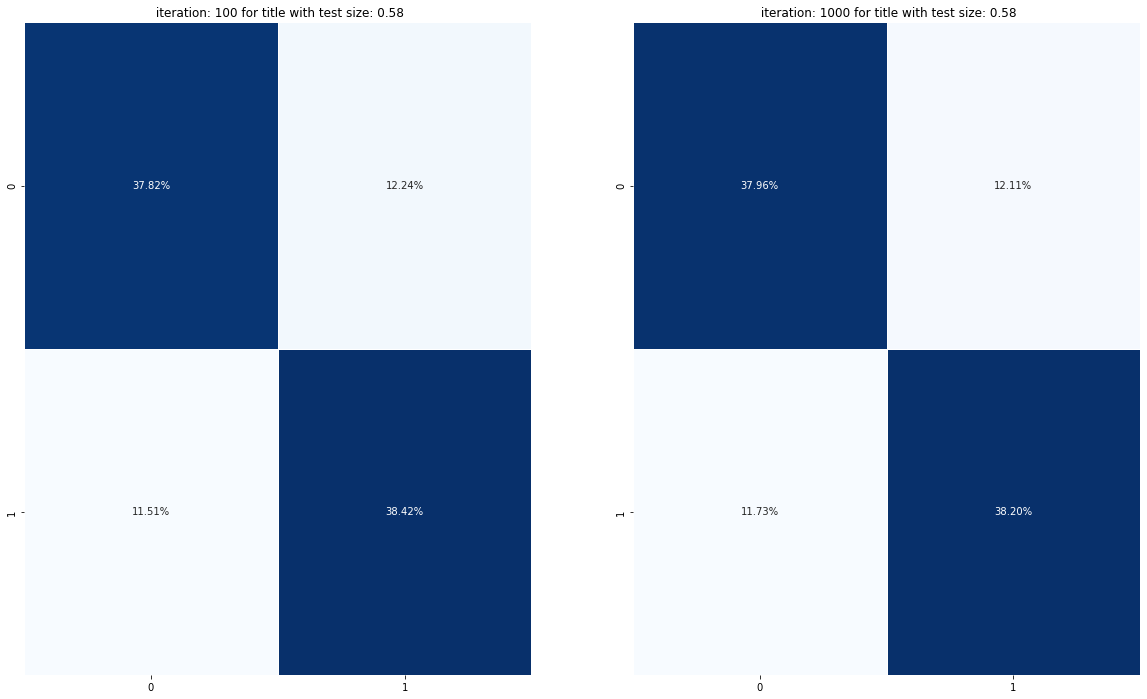

In [14]:
run_exp()